# Homework #1: The basics of statistics 

## Olha Shaposhnyk

In this homework assignment, we will work with you to practice the knowledge we have acquired in the statistics module.

**Task 1.** We discussed in lecture that the capital letter Sigma in the Greek alphabet represents a sum in mathematics. Use Python to find $\Sigma x$, $\Sigma x^2$, and $\Sigma (x-1)^2$ for the following data set:
`1 3 4`
Print the result of each calculation on the screen.

In [ ]:
a = [1, 3, 4]
sigma_sum = sum(a)
print(f'Sum of all elements  {a} = {sigma_sum}')

square = [x**2 for x in a]
sigma_square = sum(square)
print(f'Squared sum of all elements  {square} = {sigma_square}')

minus = [(x - 1)**2 for x in a]
sigma_minus = sum(minus)

print(f'Sum of squares of all elements minus 1 {minus} = {sigma_minus}')

print(f'\nSum(x) = {sigma_sum} \nSum(x^2) = {sigma_square} \nSum((x-1)^2) = {sigma_minus}')


Сума всіх елементів [1, 3, 4] = 8
Сума квадратів всіх елементів [1, 9, 16] = 26
Сума квадратів всіх елементів мінус 1 [0, 4, 9] = 13

Sum(x) = 8 
Sum(x^2) = 26 
Sum((x-1)^2) = 13


**Task 2.** We have collected data on the amount of purchases in UAH made by 20 randomly selected customers in our store (we have more customers in total) over the past month. They are represented in the variable `sum_purchases`. Find the **sample mean** for this data using each of the following methods:   

  2.1. without using any libraries, using only Python.  
  2.2. using the appropriate method of the `numpy` library.

  Print the result of calculations in each case on the screen and compare the results. Do they match?

In [58]:
import numpy as np

In [59]:
sum_purchases = [ 316,  493,  367,  153,  224,  121,  322,  450,  196,  397,  281,
  239,  484,  124,  223,  448,  432,  255, 4310, 3524]

In [ ]:
mean_manual = sum(sum_purchases)/len(sum_purchases)

mean_np = np.mean(sum_purchases)

print(f'Manual mean value: {mean_manual}, using numpy: {mean_np}')

print(f'Difference: {mean_manual - mean_np}')

if mean_manual == mean_np:
    print('Results match')
else:
    print('Results do not match')

Вибіркове середнє вручну: 667.95, з використанням numpy: 667.95
Різниця: 0.0
Результати співпадають


**Task 3.** For the same data set in the variable `sum_purchases`, calculate the **median** using each of the following methods:  

  3.1. without using any libraries, using only Python.  
  3.2. using the appropriate method of the numpy library.  

Print the result of calculations in each case on the screen. Compare the results with the value of the sample mean. Write a comment, for which tasks would you use the sample mean and for which - the median?

In [61]:
# test_odd = [ 316,  493,  367,  153,  224,  121,  322,  450,  196,  397,  281, 
#            239,  484,  124,  223,  448,  432,  255, 4310]

In [ ]:
if len(sum_purchases) % 2 == 0:
    print(f ‘The data contains an even number of entries {len(sum_purchases)} - use the average between the average neighbours’)
    median_manual = (sorted(sum_purchases)[len(sum_purchases)//2-1] + sorted(sum_purchases)[len(sum_purchases)//2])/2
else:
    print(f ‘The data must have an odd number of values {len(sum_purchases)} - use the median value’)
    median_manual = (sorted(sum_purchases)[len(sum_purchases)//2])


print(f'Sorted data:\n{sorted(sum_purchases)}\n')    
print(f'Manual median: {median_manual}')

median_np = np.median(sum_purchases)
print(f'Median using numpy: {median_np}')

if median_manual == median_np:
    print(‘Results match’)
else:
    print(‘Results do not match’) 

Дані містять парну кількість заначень 20 - використовуємо середне між середннимими сусідами
Відсортовані дані:
[121, 124, 153, 196, 223, 224, 239, 255, 281, 316, 322, 367, 397, 432, 448, 450, 484, 493, 3524, 4310]

Медіана вручну: 319.0
Медіана з використанням numpy: 319.0
Результати співпадають


In [ ]:
print(f'Difference between sample mean {mean_manual} and median {median_manual} = {mean_manual - median_manual:.2f}')

Різниця між вибірковим середнім 667.95 та медіаною 319.0 = 348.95


- Based on the analysis of the comparison between the mean and median (the difference between which is 348.95), we can say that there are strong outliers in our data, to which the mean is sensitive.
- If you look at the data more closely, you will notice that 18 out of 20 data are in the range (120; 500), but we have 2 cases of excessively high values 3524 and 4310, which introduce ‘incorrectness/noise’ when interpreting the mean.

A sample mean is appropriate if: 
- Our data is normally distributed, without extreme high or low values.
- Also, if we want to include all, all, all values in our analysis, and each value is of equal importance.  

The median is appropriate if:
- The data is not normally distributed, has outliers and skewness. The use of the median in these cases makes the calculations insensitive to outliers that are present in the database. This allows for a better representation of the ‘typical’ value for the sample. 


**Task 4**. Calculate the standard deviation of the given sample in the variable `sum_purchases` using each of the following methods:  

  4.1. without using any libraries, using only Python.  
  4.2. using the appropriate method of the numpy library.  

Print the result of calculations in each case on the screen.

In [ ]:
sum_diff = sum((x - mean_manual)**2 for x in sum_purchases) 

# Значення порогу для вибори формули з генеральної сукупності або вибірки
treshold = 30 

if len(sum_purchases) <= treshold:
    print(f'The number of items in the list is less than {treshold} - we use the formula for sampling (n-1)')
    std_manual = np.sqrt(sum_diff/(len(sum_purchases)-1))
    std_np = np.std(sum_purchases, ddof=1)

else:
    print(f'The number of items in the list is greater than {treshold} - use the formula for the general population (n)')
    std_manual = np.sqrt(sum_diff/(len(sum_purchases)))
    std_np = np.std(sum_purchases)
   
print(f'Manual standard deviation: {std_manual}')   
print(f'Standard deviation using numpy: {std_np}')

if std_manual == std_np:
    print(‘Results match’)
else:
    print(‘Results do not match’) 

Кількість елементів у списку менше 30 - використовуємо формулу для вибірки (n-1)
Стандартне відхилення вручну: 1124.5433447451132
Стандартне відхилення з використанням numpy: 1124.5433447451132
Результати співпадають


**Task 5**. We conducted a study of the age of first-year students. It turned out that
- 10 students are 16 years old
- 25 students are 17 years old
- 20 students are 18 years old
- 2 students are 20 years old

Calculate the average value for this sample in any way - in pure Python or with numpy - and display the result on the screen.

In [ ]:
students_number = [10, 25, 20, 2]
age = [16, 17, 18, 20]

sample = []

for num, year in zip(students_number, age):
    sample += [year]*num

# перевірка чи датасет згенерувався відповідно до опису завдання
# print(sample)
for indx in range(len(age)):
    print(f'Number of students aged {age[indx]} years: {sample.count(age[indx])}')

Кількість студентів віком 16 років: 10
Кількість студентів віком 17 років: 25
Кількість студентів віком 18 років: 20
Кількість студентів віком 20 років: 2


In [ ]:
sample_mean = np.mean(sample)
print(f'Selective average age of students: {sample_mean}')

Вибіркове середнє віку студентів: 17.280701754385966


**Task 6**. In addition to the data on the amount of purchases, we also collected data on the number of visits to each of the customers, which are in the variable `visits`. Calculate the Pearson's correlation coefficient for the amount of purchases and the number of visits using each of the following methods:  

  6.1. without using any libraries, using only Python.  
  6.2. using the appropriate method of the numpy library.  
  
Display the result on the screen. Analyse the result.

Additionally, display the scatter plot by calling the code below and conclude whether something should be changed in the calculation of the correlation so that the Pearson's coefficient shows a correct estimate of the linear relationship?

In [68]:
visits = [ 6,  2, 10,  3,  9,  9,  2,  3,  6,  6, 10,  2,  5, 10,  3,  5,  4,
        7,  4,  2]

In [69]:
len(sum_purchases), len(visits)

(20, 20)

In [ ]:
visits_mean = sum(visits)/len(visits)

visit_diff = sum([(y - visits_mean)**2 for y in visits])
visit_std = np.sqrt(visit_diff/(len(visits)-1))

# mean sum_purchases save in VAR "mean_manual"
# std sum_purchases save in VAR "std_manual"

#calculate covarience
sum_diff_cov = sum([(sum_purchases[i]- mean_manual)*(visits[i]-visits_mean) for i in range (len(sum_purchases))])
cov_manual = sum_diff_cov/(len(sum_purchases)-1)

r_manual = cov_manual/(std_manual*visit_std)
print(f'Pearson correlation coefficient calculated manually: {r_manual}')

r_np = np.corrcoef(sum_purchases, visits)
print(f'Pearsons correlation coefficient calculated using numpy: {r_np[0,1]}')
# print(f'Correlation matrix: \n{r_np}')
if round(r_manual, 15) == round(r_np[0,1], 15):
    print('Results match')
else:
    print('Results do not match')  


Коефіціент кореляції Пірсона розрахований вручну: -0.3026584468766646
Коефіціент кореляції Пірсона розрахований з використанням numpy: -0.3026584468766646
Результати співпадають


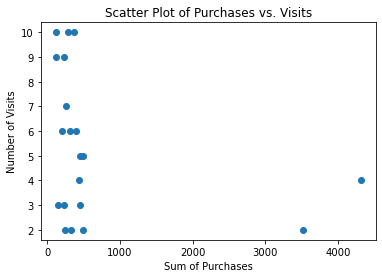

In [71]:
import matplotlib.pyplot as plt
plt.scatter(sum_purchases, visits)
plt.title('Scatter Plot of Purchases vs. Visits')
plt.xlabel('Sum of Purchases')
plt.ylabel('Number of Visits');


- the correlation values calculated manually and with the help of built-in libraries are the same.
- Based on the graph, we can conclude that the data requires additional processing.
- The main assumption is that we need to get rid of outliers. For example, by removing points from the dataset. 
You can also calculate two correlations: for the main dataset and for the outliers. If we have enough emissions to formulate a separate cluster and analyse it separately. We will have a separate analysis for people who spend little on purchases (conditionally up to 1000) and those who spend a lot. We will divide them into two clusters.
- As mentioned in the answer to task 3: If we look at the data more closely, we can see that 18 out of 20 data are in the range (120; 500), but we have 2 cases of excessively high values 3524 and 4310y

**Task 7**. In the previous problem, we noticed that emissions prevent us from getting the ‘true’ correlation value. Let's remove the records that correspond to the values with emissions in the amount of purchases and calculate the correlation coefficient. To do this, set a `threshold' equal to the mean + 2 standard deviations of the purchase amount, and all values above it will be considered emissions (there are other rules for determining emissions, which we will get acquainted with later).

Extract the values from both arrays and calculate the Pearson correlation coefficient with `numpy` for the number of visits and the amount of purchases without outliers. Display the result on the screen, draw a scatter plot and analyse the result: what can we say about the relationship in the data?

In [ ]:
# sum_purchases std saved in VAR manual_std
# sum_purchases mean saved in VAR mean_manual

treshold = mean_manual + 2 * std_manual
print(f'Set threshold for emissions detection as ‘mean + 2*std’ = : {treshold}\n')

filtered_sum_purchases =[x for x in sum_purchases if x <= treshold]
filtered_visits = [visits[i] for i in range (len(visits)) if sum_purchases[i] <= treshold]

print(f'Filtered array from outliers for variable sum_purchases:\n{filtered_sum_purchases}')
print(f'Filtered outlier array for variable visits:\n{filtered_visits}')

Встановлюємо поріг для виявлення викидів як "mean + 2*std" = : 2917.0366894902263

Відфільтрований масив від викидів для змінної sum_purchases:
[316, 493, 367, 153, 224, 121, 322, 450, 196, 397, 281, 239, 484, 124, 223, 448, 432, 255]
Відфільтрований масив від викидів для змінної visits:
[6, 2, 10, 3, 9, 9, 2, 3, 6, 6, 10, 2, 5, 10, 3, 5, 4, 7]


In [ ]:
r_creal = np.corrcoef(filtered_sum_purchases, filtered_visits)
print(f'Correlation coefficient for filtered data: {r_creal[0,1]}')

Коефіцієнт кореляціїдля відфільтрованих даних: -0.3685212078127798


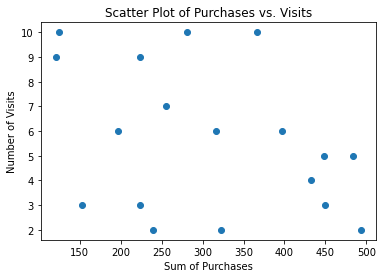

In [74]:
plt.scatter(filtered_sum_purchases, filtered_visits)
plt.title('Scatter Plot of Purchases vs. Visits')
plt.xlabel('Sum of Purchases')
plt.ylabel('Number of Visits');

Conclusions:
- The Pearson's coefficient (-0.3685) indicates a weak-medium negative linear relationship between the amount of purchases and the number of visits.
- This can be interpreted as: as the amount of purchases (the first parameter) increases, the number of visits (the second parameter) decreases slightly.
   - This makes sense, because if it's a grocery store, for example, and a person shops once a week, they spend a large amount at once. And if they shop more often (once every 2 days), then the amount of each purchase will be smaller, because they need less food.
- Despite the fact that getting rid of the outliers helped improve the correlation coefficients (from -0.30 to -0.36), our data is still very sparse and it is difficult to capture complex relationships between them.
- Plan to improve the situation:
   - increase the number of data in the sample to have a more representative situation
   - You can also try to look for non-linear relationships. However, based on a visual analysis of the graph, it is difficult to identify a more pronounced type of relationship